In [83]:
%matplotlib notebook

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
#print(city_data.head())
ride_data=pd.read_csv(ride_data_to_load)
#ride_data.head()


In [85]:
# Combine the data into a single dataset
combined_data=pd.merge(ride_data, city_data, on="city", how="left")
# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [86]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

In [87]:
combined_data_outer=pd.merge(ride_data, city_data, how="outer", on="city")
city_group=combined_data_outer.groupby(['type','city'])
#city_group.head()

In [88]:
# Average fare per city types 
# BY RUNNING THE ABOVE - BASED ON OUTER MERGE AND GROUPBY, KNOW THERE ARE 3 CITY TYPES
type1="Rural"
type2="Suburban"
type3="Urban"

# average fare -y
average_fare=city_group["fare"].mean()
urban_average_fare=average_fare.loc[type3]
suburban_average_fare=average_fare.loc[type2]
rural_average_fare=average_fare.loc[type1]
#print(average_fare)
#print(urban_average_fare)
#print(suburban_average_fare)
#print(rural_average_fare)

# total # driver count per city = s
total_driver_count_percity=city_group["driver_count"].first()
urban_driver_count=total_driver_count_percity.loc[type3]
suburban_driver_count=total_driver_count_percity.loc[type2]
rural_driver_count=total_driver_count_percity.loc[type1]
#print(total_driver_count_percity)
#print(rural_driver_count)

# total # of rides per city - x
rides_city=city_group["ride_id"].count()
urban_rides_count=rides_city.loc[type3]
suburban_rides_count=rides_city.loc[type2]
rural_rides_count=rides_city.loc[type1]
#print(drivers_city)

<IPython.core.display.Javascript object>


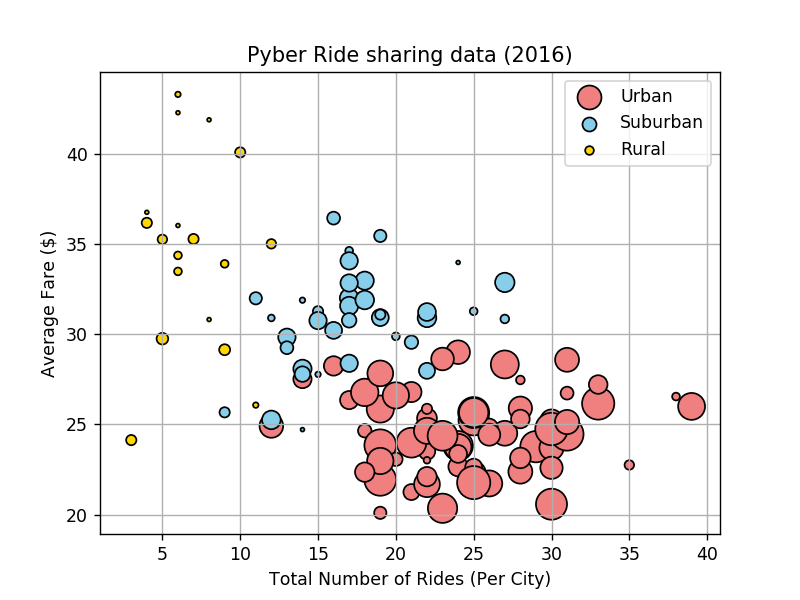

In [89]:
# Bubble plots
urban=plt.scatter(urban_rides_count,urban_average_fare, marker="o", facecolor='lightcoral',edgecolor="black", s=5*urban_driver_count, label="Urban")
suburban=plt.scatter(suburban_rides_count, suburban_average_fare, marker="o", facecolor='skyblue', edgecolor="black", s= 5*suburban_driver_count, label="Suburban")
rural=plt.scatter(rural_rides_count, rural_average_fare, marker="o", facecolor='gold', edgecolor="black", s= 5*rural_driver_count, label="Rural")


In [90]:
# add title, labels, legend
plt.figure(1)
plt.title("Pyber Ride sharing data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.legend(handles=[urban, suburban, rural], loc="best")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [91]:
plt.show()
plt.savefig("outputs/Pyber_ride_sharing_data.jpg")

## Total Fares by City Type

In [92]:
# Calculation
#% total fares by city type
total_fare=combined_data["fare"].sum()
print(total_fare)

# Total fare by city type
city_group2=combined_data.groupby(['type'])
total_fare_citytype=city_group2["fare"].sum()

# % total fares by city type
percent_fares_citytype = round((total_fare_citytype/total_fare)*100,1)

print(city_group2)
print(total_fare_citytype)
print(percent_fares_citytype)

63538.64
type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64
type
Rural        6.8
Suburban    30.5
Urban       62.7
Name: fare, dtype: float64


<IPython.core.display.Javascript object>


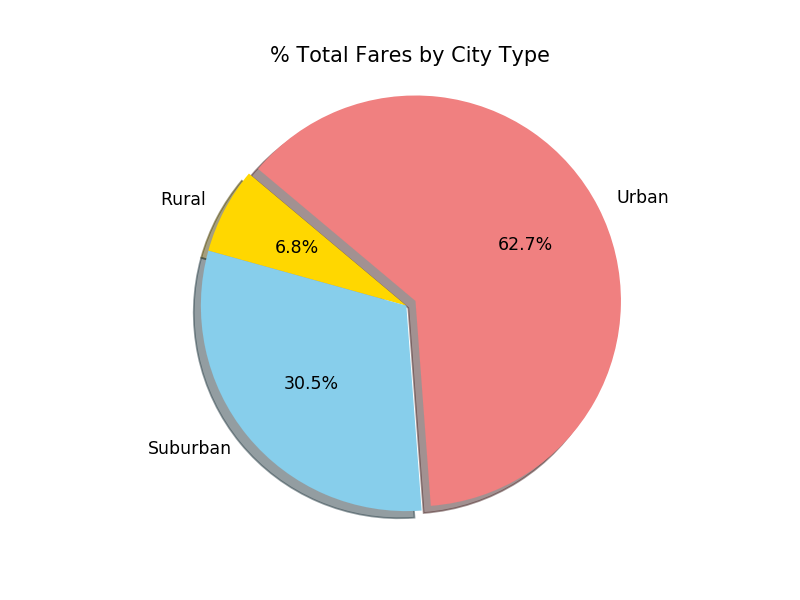

In [93]:
# set array for pie plot
# BASED ON OUTPUTS ABOVE - WE CAN SETUP LIST OF DATA FOR PLOT

plt.figure(2)
city_type= ["Rural", "Suburban", "Urban"]
percent_total_fares=[6.8, 30.5, 62.7]
colors=["gold", "skyblue", "lightcoral"]
explode=[0, 0, 0.05]

#generate pie plot
plt.title("% Total Fares by City Type")
plt.pie(percent_total_fares, explode=explode, labels= city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

In [94]:
# Save figure
plt.savefig("outputs/Percent_total_fares_by_city_type.jpg")

## Total Rides by City Type

In [95]:
# Calculation Total Rides by City type
# total rides by city type
total_rides=combined_data["ride_id"].count()
print(total_rides)

# Total rides by city type
#city_group2=combined_data.groupby(['type'])
total_rides_citytype=city_group2["ride_id"].count()

# % total rides by city type
percent_rides_citytype = round((total_rides_citytype/total_rides)*100,1)

print(total_rides_citytype)
print(percent_rides_citytype)

2375
type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64
type
Rural        5.3
Suburban    26.3
Urban       68.4
Name: ride_id, dtype: float64


<IPython.core.display.Javascript object>


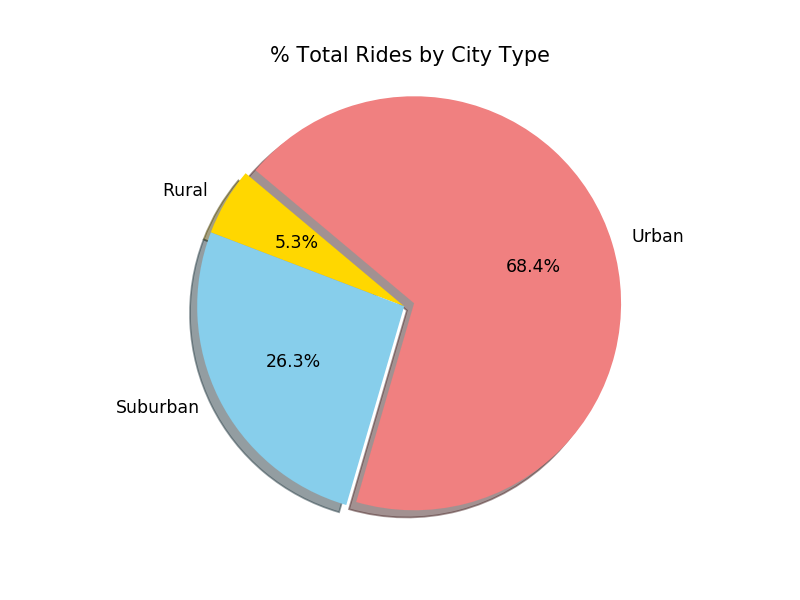

In [96]:
# set array for pie plot
# BASED ON OUTPUT DATA ABOVE, WE CAN SETUP LIST OF DATA FOR PLOT

city_type= ["Rural", "Suburban", "Urban"]
percent_total_rides=[5.3, 26.3, 68.4]
colors=["gold", "skyblue", "lightcoral"]
explode=[0, 0, 0.05]

#generate pie plot
plt.figure(3)
plt.title("% Total Rides by City Type")
plt.pie(percent_total_rides, explode=explode, labels= city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 140)
plt.axis("equal")
plt.show()

In [97]:
# Save figure
plt.savefig("outputs/Percent_total_Rides_by_city_type.jpg")

## Total Drivers by City Type

In [98]:
# Calculation Total Drivers by City type
# total drivers by city type (use city_data)
city_data_df=city_data.groupby(['type'])

total_drivers=city_data["driver_count"].sum()
print(total_drivers)

# Total drivers by city type
#city_group2=combined_data.groupby(['type'])
total_drivers_citytype=city_data_df["driver_count"].sum()

# % total drivers by city type
percent_drivers_citytype = round((total_drivers_citytype/total_drivers)*100,1)

print(total_drivers_citytype)
print(percent_drivers_citytype)

2973
type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64
type
Rural        2.6
Suburban    16.5
Urban       80.9
Name: driver_count, dtype: float64


<IPython.core.display.Javascript object>


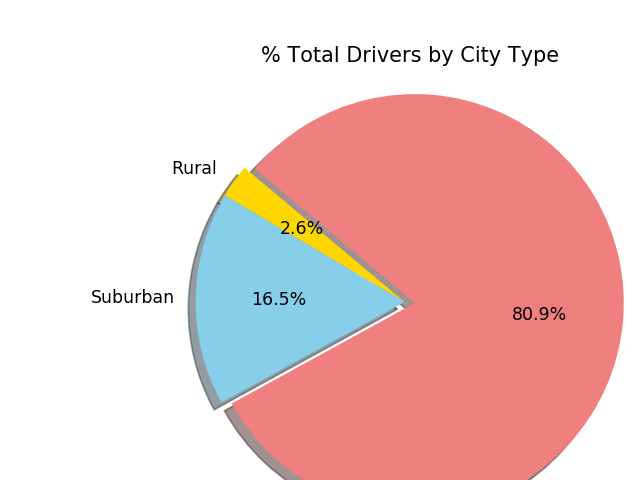

In [99]:
# set array for pie plot
# BASED ON OUTPUT DATA ABOVE, WE CAN SETUP LIST OF DATA FOR PLOT

city_type= ["Rural", "Suburban", "Urban"]
percent_total_drivers = [2.6, 16.5, 80.9]
colors=["gold", "skyblue", "lightcoral"]
explode=[0, 0, 0.05]

#generate pie plot
plt.figure(4)
plt.title("% Total Drivers by City Type")
plt.pie(percent_total_drivers, explode=explode, labels= city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 140)
plt.axis("equal")
plt.show()

In [100]:
# Save figure
plt.savefig("outputs/Percent_total_Drivers_by_city_type.jpg")

In [82]:
##SUMMARY
## in Urban area, average fare is cheaper compare to Suburban and Rural area
## More rides in Urban area

##  Percent total drivers in Urban area is the highest and rural has the smallest 
##  % of drivers

## And Urban area has the highest percent of # of rides

## ===> Urban area (high population): cheaper average fare ===> highest % drivers
## ==> highest % of rides